## Basis of Cluster Analysis

### Import the relevant libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [10]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the data

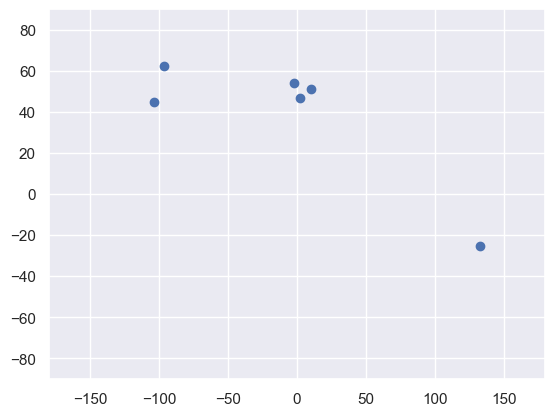

In [17]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Select the features

In [20]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [36]:
kmeans = KMeans(3)

In [38]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering the results

In [40]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [42]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


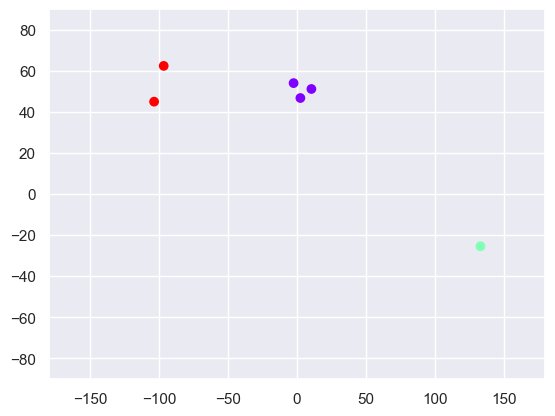

In [44]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### According to language

### Map the data

In [48]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'German': 1, 'French': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,2
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,1
5,Australia,-25.45,133.11,0


In [135]:
y = data_mapped.iloc[:,1:4]
y

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,2
3,54.01,-2.53,0
4,51.15,10.40,1
5,-25.45,133.11,0


### Clustering

In [137]:
kmeans = KMeans(3)

In [139]:
kmeans.fit(y)

KMeans(n_clusters=3)

In [141]:
identified_clusters = kmeans.fit_predict(y)
identified_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [143]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,2,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,1,1
5,Australia,-25.45,133.11,0,2


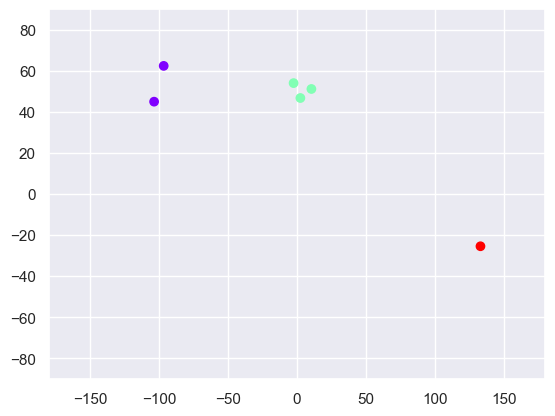

In [145]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Selecting the number of clusters

### WCSS

In [149]:
kmeans.inertia_

290.1052333333333

In [153]:
wcss =[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [155]:
wcss

[42601.91356666667,
 17243.964500000002,
 288.1052333333333,
 111.91233333333332,
 38.50624999999999,
 0.0]

### The elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

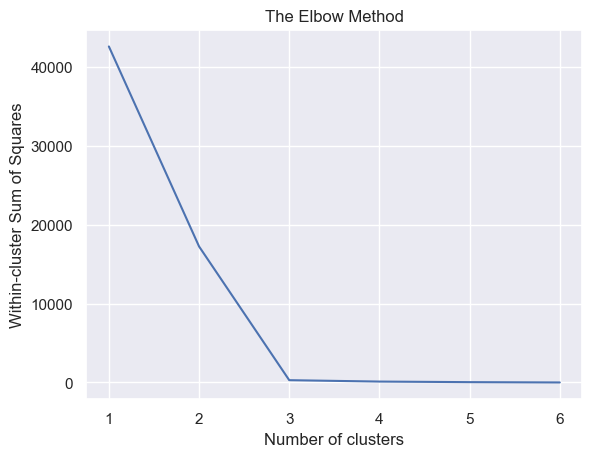

In [158]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')